# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

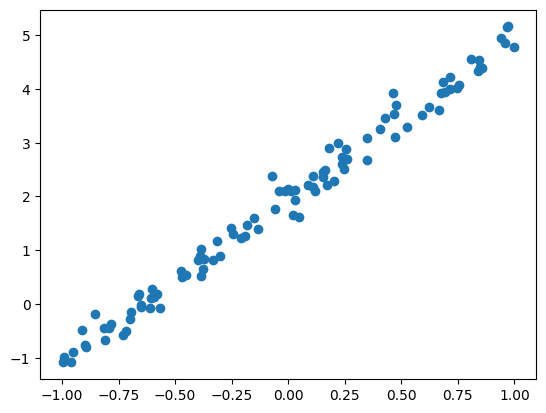

In [83]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [84]:
#Analytical model

x_mean = np.mean(xd)

y_mean = np.mean(yd)

numerator = np.sum((xd - x_mean) * (yd - y_mean))
denominator = np.sum((xd - x_mean) ** 2)

beta1 = numerator / denominator

beta0 = y_mean - beta1 * x_mean

analyticalModel = np.array([beta0,beta1])

### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same.

**Analytical Model Result**

In [85]:
#evaluate your model

# new data
xplot = np.random.uniform(-1,1,  len(xd)) # generate uniform points between -1 and 1

# prediction
ypredict = analyticalModel[0] + analyticalModel[1] * xplot# get prediction on data xplot


**Polyfit Model Prediction**

In [86]:
polyfitModel = np.poly1d(np.polyfit(xd, yd, 1)) #use the polyfit function
yfit = polyfitModel(xplot)# use the polyval function to evaluate polyfitModel at x = xplot

In [87]:
mse_analytical = np.mean((yd - ypredict) ** 2)
mse_polyfit = np.mean((yd - yfit) ** 2)

print(f"MSE for Analytical Model: {mse_analytical}")
print(f"MSE for Polyfit Model: {mse_polyfit}")

MSE for Analytical Model: 6.348477096222815
MSE for Polyfit Model: 6.348477096222812


### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

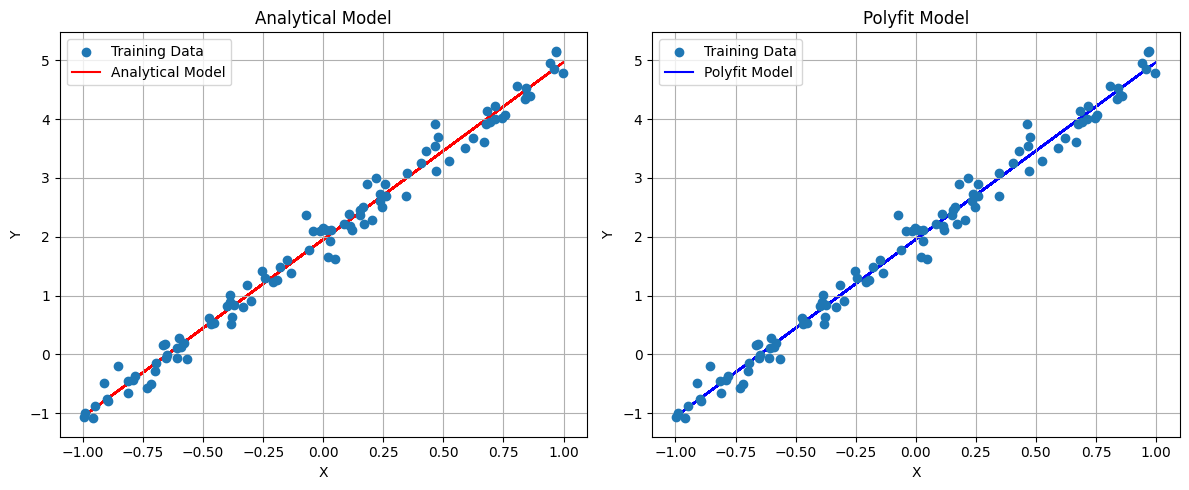

In [88]:
import matplotlib.pyplot as plt

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the Analytical Model
ax1.scatter(xd, yd, label="Training Data", zorder=2)
ax1.plot(xplot, ypredict, color="red", label="Analytical Model", zorder=1)
ax1.set(xlabel='X', ylabel='Y', title='Analytical Model')
ax1.grid()
ax1.legend()

# Plot for the Polyfit Model
ax2.scatter(xd, yd, label="Training Data", zorder=2)
ax2.plot(xplot, yfit, color="blue", label="Polyfit Model", zorder=1)
ax2.set(xlabel='X', ylabel='Y', title='Polyfit Model')
ax2.grid()
ax2.legend()

plt.tight_layout()  # Ensures that the subplots do not overlap
plt.show()


## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test.

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

train, test = train_test_split(df, test_size=0.7, random_state=42)

### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [90]:
from sklearn.linear_model import LinearRegression

X_tv = train[['TV']]
X_newspaper = train[['newspaper']]
X_radio = train[['radio']]
y = train['sales']

model_tv = LinearRegression()
model_newspaper = LinearRegression()
model_radio = LinearRegression()

sales_TV_beta = model_tv.fit(X_tv, y).coef_[0]
sales_newspaper_beta = model_newspaper.fit(X_newspaper, y).coef_[0]
sales_radio_beta = model_radio.fit(X_radio, y).coef_[0]


### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

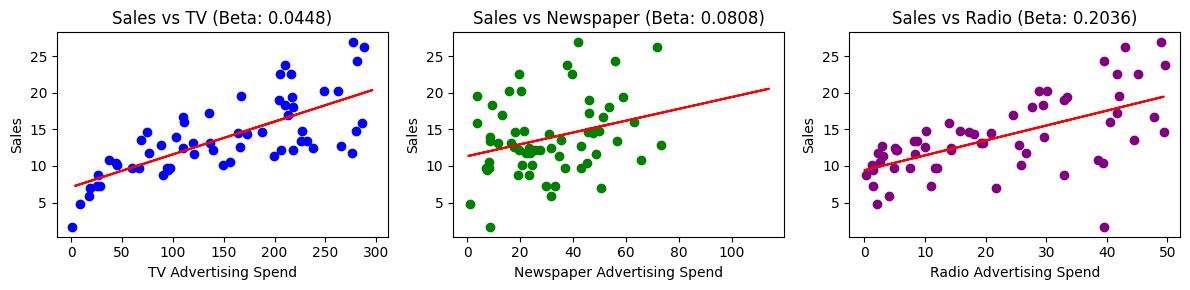

In [91]:
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
plt.scatter(X_tv, y, color='blue')
plt.plot(test[['TV']], model_tv.predict(test[['TV']]), color='red')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title(f'Sales vs TV (Beta: {sales_TV_beta:.4f})')

## Sales to newspaper spend
plt.subplot(1,3,2)
plt.scatter(X_newspaper, y, color='green')
plt.plot(test[['newspaper']], model_newspaper.predict(test[['newspaper']]), color='red')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.title(f'Sales vs Newspaper (Beta: {sales_newspaper_beta:.4f})')

## Sales to radio spend
plt.subplot(1,3,3)
plt.scatter(X_radio, y, color='purple')
plt.plot(test[['radio']], model_radio.predict(test[['radio']]), color='red')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.title(f'Sales vs Radio (Beta: {sales_radio_beta:.4f})')

plt.tight_layout()
plt.show()


## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [92]:

# Define training X matrix
X = np.vstack((np.ones(train['newspaper'].size), train['newspaper'], train['radio'], train['TV']))
trainX = X.transpose()

# Define training Y matrix
trainY = train['sales']

# Get your Model(Using the closed form in class)
XTX = np.dot(trainX.T, trainX)
XTY = np.dot(trainX.T, trainY)
multivariate_beta = np.linalg.solve(XTX, XTY)

print("Multivariate Regression Coefficients:")
print("Intercept (Beta0):", multivariate_beta[0])
print("TV (Beta1):", multivariate_beta[1])
print("Radio (Beta2):", multivariate_beta[2])
print("Newspaper (Beta3):", multivariate_beta[3])

Multivariate Regression Coefficients:
Intercept (Beta0): 2.814204654439256
TV (Beta1): 0.013392018905482942
Radio (Beta2): 0.18886610145636792
Newspaper (Beta3): 0.04330866096365895


### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [93]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predcit result using your model multivariate_beta
pred = np.dot(testX, multivariate_beta)

print("Predicted Sales:")
print(pred)

Predicted Sales:
[16.5631156  20.99406785 21.42275734 10.89539439 21.6523961  13.38275804
 20.85900712  7.41689763 13.26363105 15.06888707  8.85399601  6.72243114
 14.7478736   8.82105283  9.60860937 12.12989341  8.99192491 15.96274289
 10.3445693  18.43681077 19.84760523 14.18972134 12.23060268 21.54220336
  7.57100982  5.79553942 20.63449637 11.72225819  9.16619318  8.34327861
 12.24223778  9.92799302 21.56180387 12.99681615 18.0916893  19.67941268
 13.89655191 20.92551902 10.73862831  4.58459338  9.60163394 12.32200131
 10.19359271  8.13712106 13.17753885  5.35220994  9.44004811 13.9632578
  8.88151282 11.52674558 15.50190014 11.61975032 13.43094378 11.17653971
  6.47228111  9.91405235  9.37654114 24.0354312   7.68692737 12.11204033
 17.21454656 15.08278861 11.50695457 11.35668499 16.29221557  6.97489232
 20.78532416  6.22272968  9.68054749 11.41323011  9.02372006  6.41076584
 14.7348685  17.30623657 16.28791038 15.92563628 14.70552852 19.13596435
 13.92509763 20.7695147  13.1561345

### Plot Result

**Q9**: Plot your predictions against real labels.

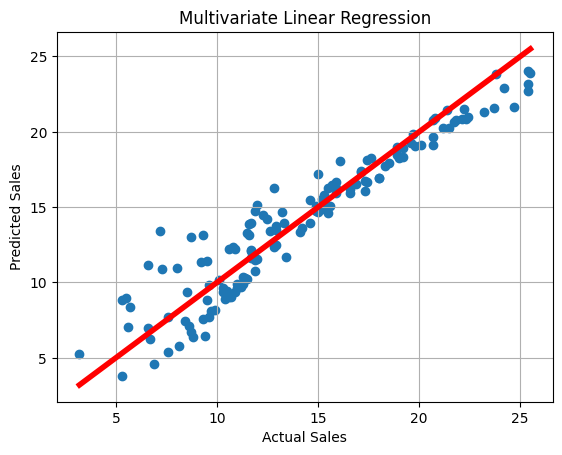

In [94]:
fig, ax = plt.subplots()

# Your Code
ax.scatter(testY, pred)
ax.plot([testY.min(), testY.max()], [testY.min(), testY.max()], color = 'red', lw=4)
ax.set(xlabel='Actual Sales', ylabel='Predicted Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()